# Probability: binomial distribution

### Dice throwing 

Using the binomial distribution to check
the probability of geting a given side of the dice k times 
out of N dice throws

P( 0 )=  0.11215665478461512
P( 1 )=  0.26917597148307565
P( 2 )=  0.2960935686313832
P( 3 )=  0.1973957124209224
P( 4 )=  0.08882807058941501
P( 5 )=  0.02842498258861284
P( 6 )=  0.006632495937342981
P( 7 )=  0.0011369993035445134
P( 8 )=  0.00014212491294306412
P( 9 )=  1.263332559493906e-05
P( 10 )=  7.579995356963415e-07
P( 11 )=  2.7563619479866987e-08
P( 12 )=  4.5939365799778283e-10
Total probability: 0.9999999999999984


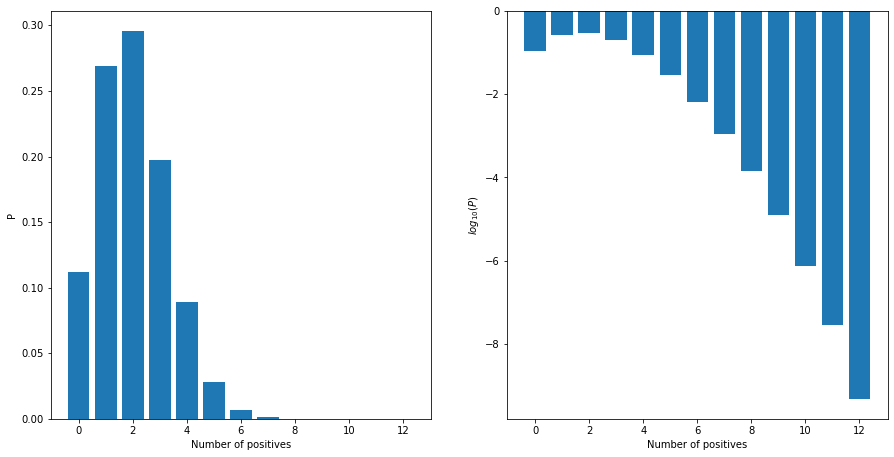

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scp 
import numpy as np

Nt = 12     # Number of dice throws
Pside = 1/6 # Probability to get a given side
dist = scp.binom(Nt,Pside) # Binomial distribution (N,Pside)

# Possible positive results: from 0 to N
values = range(0,Nt+1)
P = dist.pmf(values)
Ptot = sum(P) # Total probability

for i,value in zip(values,P):
    print("P(",i,")= ", value)
    
print('Total probability:',  Ptot)  

# Plot probabilities
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

p1= plt.subplot(1,2,1)
plt.xlabel("Number of positives")
plt.ylabel("P")
b= plt.bar(values,P )

p1= plt.subplot(1,2,2)
plt.xlabel("Number of positives")
plt.ylabel("$log_{10}(P)$")
b= plt.bar(values,np.log10(P) )

### Generating binomially-distributed random numbers

Nhits   Obs.   Pred.
--------------------
 0     11230   11215
 1     26923   26917
 2     29588   29609
 3     19746   19739
 4      8902    8882
 5      2800    2842
 6       688     663
 7       110     113
 8        12      14
 9         1       1


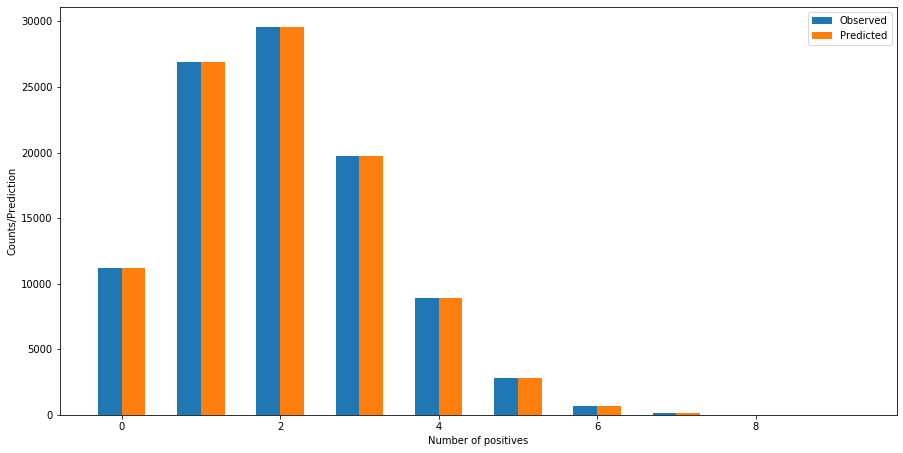

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scp 
import numpy as np

# Parameters of the binomial distribution
Nt = 12       # Number of dice throws
Pside = 1/6 # Probability to get a given side
dist = scp.binom(Nt,Pside) # Binomial distribution (N,Pside)

# Generate values
N = 100000 # Number of values to generate
x = dist.rvs(N)

# Count instances of each value
values, counts = np.unique(x, return_counts=True) # Count instances of each value

# Calculate predicted counts
pred = N * dist.pmf(values)

# Plot results
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

print("Nhits   Obs.   Pred.")
print("--------------------")

for i in range(len(counts)):
    print("{:2d}     {:5d}   {:5d}".format(values[i],int(counts[i]),int(pred[i]) ) )

plt.xlabel("Number of positives")
plt.ylabel("Counts/Prediction")
b1= plt.bar(values-0.15,counts,width=0.3, label="Observed")
b2= plt.bar(values+0.15,pred,width=0.3, label="Predicted")
plt.legend()